## Predicting Stroke using Machine Learning


In [3]:
#Các thư viện cần thiết trực quan và phân tích
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Các mô hình sẽ áp dụng
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#Huấn luyện,kiểm thử và đánh giá hiệu suất mô hình
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, roc_auc_score 
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn import metrics

In [5]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [6]:
df.shape

(5110, 12)

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


1. id: Mã định danh duy nhất
2. gender:- Giới tính -
*  'Male'=Nam,
*  'Female'=Nữ,
*  'Other'=Khác
3. age: -Tuổi tác
4. hypertension: 
*   0- bệnh nhân không bị tăng huyết áp,  
*   1- bệnh nhân bị tăng huyết áp
5. heart_disease:
*   0- bệnh nhân không bị bệnh tim, 
*   1- bệnh nhân bị bệnh tim
6. ever_married: 'Yes'- Có, 'No'-Không
7. work_type: 
*   'Children'=Trẻ em, 
*   'Got_jov'=Nhân viên chính phủ, 
*   'Never_worked'=Chưa từng làm việc, 
*   'Private'=Tư nhân, 
*   'Self_employed'=Tự kinh doanh
8. Residence_type: 
*   'Rural'=Nông thôn
*   'Urban'=Thành thị
9. avg_glucose_level: mức đường huyết trung bình
10. bmi:chỉ số khối cơ thể
11. smoking_status:
*    'formely smoked': đã từng hút thuốc
*    'never smoked':chưa từng hút thuốc
*    'smokes':đang hút thuốc
*    'Unknown':Chưa biết
12. Stroke: 
*   0- không bị đột quỵ, 
*   1- bị bệnh đột quỵ

    *Ghi chú: "Unknown" trong thuộc tính 'Smoking_status' nghĩa là thông tin này không có sẵn cho bệnh nhân này.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## Data Preprocessing

In [11]:
#Kiểm tra giá trị null
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
#Loại bỏ giá trị null
df.dropna(inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
#Loại bỏ các biến 'Other' trong 'gender'
df.drop(df[df['gender'] == "Other"].index , axis = 0 , inplace = True)
#Đưa kiểu dữ liệu Age về int
df['age'] = df['age'].astype('int64')

In [14]:
# Thay thể các 'fomerly smoked' thành 'smokes'
df['smoking_status'].iloc[df['smoking_status'] == 'formerly smoked'] = 'smokes'
# Loại bỏ các giá trị 'Unknown'
df.drop(df[df['smoking_status'] == 'Unknown'].index ,axis=0 , inplace=True)

C:\Users\nguye\AppData\Local\Temp\ipykernel_38624\3144165813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'].iloc[df['smoking_status'] == 'formerly smoked'] = 'smokes'


In [15]:
#set lại index sau khi loại bỏ các dòng có giá trị null
df.drop(["id"] ,axis=1, inplace=True)
df.reset_index(drop=True,inplace=True)

In [16]:
df.shape

(3425, 11)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3425 non-null   object 
 1   age                3425 non-null   int64  
 2   hypertension       3425 non-null   int64  
 3   heart_disease      3425 non-null   int64  
 4   ever_married       3425 non-null   object 
 5   work_type          3425 non-null   object 
 6   Residence_type     3425 non-null   object 
 7   avg_glucose_level  3425 non-null   float64
 8   bmi                3425 non-null   float64
 9   smoking_status     3425 non-null   object 
 10  stroke             3425 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 294.5+ KB


In [18]:
categorical_cols=list(df.select_dtypes(include='O').columns) + ["stroke" , "hypertension" , "heart_disease"]
categorical_cols

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke',
 'hypertension',
 'heart_disease']

In [19]:
df[categorical_cols] = df[categorical_cols].astype('object')
categorical_cols.remove('stroke')

In [20]:
for i in categorical_cols:
    display(df[i].value_counts())
    print("#"*20)

Female    2086
Male      1339
Name: gender, dtype: int64

####################


Yes    2599
No      826
Name: ever_married, dtype: int64

####################


Private          2200
Self-employed     629
Govt_job          514
children           68
Never_worked       14
Name: work_type, dtype: int64

####################


Urban    1745
Rural    1680
Name: Residence_type, dtype: int64

####################


never smoked    1852
smokes          1573
Name: smoking_status, dtype: int64

####################


0    3017
1     408
Name: hypertension, dtype: int64

####################


0    3219
1     206
Name: heart_disease, dtype: int64

####################


In [21]:
df['stroke'].value_counts() #imbalance

0    3245
1     180
Name: stroke, dtype: int64

In [22]:
print("Dữ liệu ban đầu của cột 'bmi':")
print(df['bmi'].head())

Dữ liệu ban đầu của cột 'bmi':
0    36.6
1    32.5
2    34.4
3    24.0
4    29.0
Name: bmi, dtype: float64


In [23]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

In [24]:
#Áp dụng hàm cho cột 'bmi' và thay thế giá trị ban đầu
df['bmi'] = df['bmi'].apply(categorize_bmi)
# Kiểm tra lại dữ liệu sau khi thay thế giá trị trong cột 'bmi'
print("Dữ liệu sau khi thay thế giá trị trong cột 'bmi':")
print(df['bmi'].head())

Dữ liệu sau khi thay thế giá trị trong cột 'bmi':
0          Obesity
1          Obesity
2          Obesity
3    Normal weight
4       Overweight
Name: bmi, dtype: object


In [25]:
def categorize_glucose_level(glucose):
    if glucose < 100:
        return 'Normal'
    elif 100 <= glucose < 126:
        return 'Prediabetes'
    else:
        return 'Diabetes'

In [26]:
#Áp dụng hàm cho cột 'avg_glucose_level' và thay thế giá trị ban đầu
df['avg_glucose_level'] = df['avg_glucose_level'].apply(categorize_glucose_level)
# Kiểm tra lại dữ liệu sau khi thay thế giá trị trong cột 'avg_glucose_level'
print("Dữ liệu sau khi thay thế giá trị trong cột 'avg_glucose_level':")
print(df['avg_glucose_level'].head())

Dữ liệu sau khi thay thế giá trị trong cột 'avg_glucose_level':
0       Diabetes
1    Prediabetes
2       Diabetes
3       Diabetes
4       Diabetes
Name: avg_glucose_level, dtype: object


In [27]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,Diabetes,Obesity,smokes,1
1,Male,80,0,1,Yes,Private,Rural,Prediabetes,Obesity,never smoked,1
2,Female,49,0,0,Yes,Private,Urban,Diabetes,Obesity,smokes,1
3,Female,79,1,0,Yes,Self-employed,Rural,Diabetes,Normal weight,never smoked,1
4,Male,81,0,0,Yes,Private,Urban,Diabetes,Overweight,smokes,1
5,Male,74,1,1,Yes,Private,Rural,Normal,Overweight,never smoked,1
6,Female,69,0,0,No,Private,Urban,Normal,Normal weight,never smoked,1
7,Female,81,1,0,Yes,Private,Rural,Normal,Overweight,never smoked,1
8,Female,61,0,1,Yes,Govt_job,Rural,Prediabetes,Obesity,smokes,1
9,Female,54,0,0,Yes,Private,Urban,Prediabetes,Overweight,smokes,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             3425 non-null   object
 1   age                3425 non-null   int64 
 2   hypertension       3425 non-null   object
 3   heart_disease      3425 non-null   object
 4   ever_married       3425 non-null   object
 5   work_type          3425 non-null   object
 6   Residence_type     3425 non-null   object
 7   avg_glucose_level  3425 non-null   object
 8   bmi                3425 non-null   object
 9   smoking_status     3425 non-null   object
 10  stroke             3425 non-null   object
dtypes: int64(1), object(10)
memory usage: 294.5+ KB


In [29]:
X=df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type' , 'avg_glucose_level', 'bmi', 'smoking_status']].values
X[0:5]

array([['Male', 67, 0, 1, 'Yes', 'Private', 'Urban', 'Diabetes',
        'Obesity', 'smokes'],
       ['Male', 80, 0, 1, 'Yes', 'Private', 'Rural', 'Prediabetes',
        'Obesity', 'never smoked'],
       ['Female', 49, 0, 0, 'Yes', 'Private', 'Urban', 'Diabetes',
        'Obesity', 'smokes'],
       ['Female', 79, 1, 0, 'Yes', 'Self-employed', 'Rural', 'Diabetes',
        'Normal weight', 'never smoked'],
       ['Male', 81, 0, 0, 'Yes', 'Private', 'Urban', 'Diabetes',
        'Overweight', 'smokes']], dtype=object)

In [30]:
# Kiểm tra các giá trị độc nhất trong các cột phân loại
print("Unique values in 'gender':", pd.unique(X[:, 0]))
print("Unique values in 'ever_married':", pd.unique(X[:, 4]))
print("Unique values in 'work_type':", pd.unique(X[:, 5]))
print("Unique values in 'Residence_type':", pd.unique(X[:, 6]))
print("Unique values in 'avg_glucose_level':", pd.unique(X[:, 7]))
print("Unique values in 'bmi':", pd.unique(X[:, 8]))
print("Unique values in 'smoking_status':", pd.unique(X[:, 9]))

Unique values in 'gender': ['Male' 'Female']
Unique values in 'ever_married': ['Yes' 'No']
Unique values in 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values in 'Residence_type': ['Urban' 'Rural']
Unique values in 'avg_glucose_level': ['Diabetes' 'Prediabetes' 'Normal']
Unique values in 'bmi': ['Obesity' 'Normal weight' 'Overweight' 'Underweight']
Unique values in 'smoking_status': ['smokes' 'never smoked']


In [31]:
# Mã hóa các biến phân loại
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['Male', 'Female'])
X[:, 0] = le_gender.transform(X[:, 0])

le_married = preprocessing.LabelEncoder()
le_married.fit(['Yes', 'No'])
X[:, 4] = le_married.transform(X[:, 4])

le_work = preprocessing.LabelEncoder()
le_work.fit(['children', 'Govt_job', 'Never_worked', 'Private', 'Self-employed'])
X[:, 5] = le_work.transform(X[:, 5])

le_residence = preprocessing.LabelEncoder()
le_residence.fit(['Urban','Rural'])
X[:, 6] = le_residence.transform(X[:, 6])

le_gluco = preprocessing.LabelEncoder()
le_gluco.fit(['Normal', 'Prediabetes', 'Diabetes'])
X[:, 7] = le_gluco.transform(X[:, 7])

le_bmi = preprocessing.LabelEncoder()
le_bmi.fit(['Underweight', 'Normal weight', 'Overweight', 'Obesity'])
X[:, 8] = le_bmi.transform(X[:, 8])

le_smoking = preprocessing.LabelEncoder()
le_smoking.fit(['never smoked', 'smokes'])
X[:, 9] = le_smoking.transform(X[:, 9])

# Kiểm tra lại dữ liệu sau khi mã hóa
print(X[:10])



[[1 67 0 1 1 2 1 0 1 1]
 [1 80 0 1 1 2 0 2 1 0]
 [0 49 0 0 1 2 1 0 1 1]
 [0 79 1 0 1 3 0 0 0 0]
 [1 81 0 0 1 2 1 0 2 1]
 [1 74 1 1 1 2 0 1 2 0]
 [0 69 0 0 0 2 1 1 0 0]
 [0 81 1 0 1 2 0 1 2 0]
 [0 61 0 1 1 0 0 2 1 1]
 [0 54 0 0 1 2 1 2 2 1]]


In [32]:
y = df["stroke"]
print(y[0:5])

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: object


In [33]:
#Thay thế các biến phân loại đã mã hóa vào data
df['gender'] = le_gender.transform(df['gender'])
df['ever_married'] = le_married.transform(df['ever_married'])
df['work_type'] = le_work.transform(df['work_type'])
df['Residence_type'] = le_residence.transform(df['Residence_type'])
df['avg_glucose_level'] = le_gluco.transform(df['avg_glucose_level'])
df['bmi'] = le_bmi.transform(df['bmi'])
df['smoking_status'] = le_smoking.transform(df['smoking_status'])

# Kiểm tra lại dữ liệu sau khi mã hóa
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,0,1,1,1
1,1,80,0,1,1,2,0,2,1,0,1
2,0,49,0,0,1,2,1,0,1,1,1
3,0,79,1,0,1,3,0,0,0,0,1
4,1,81,0,0,1,2,1,0,2,1,1


In [34]:
# Kiểm tra ánh xạ của le_gender
print("Gender mapping:", dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))

# Kiểm tra ánh xạ của le_married
print("Married mapping:", dict(zip(le_married.classes_, le_married.transform(le_married.classes_))))

# Kiểm tra ánh xạ của le_work
print("Work Type mapping:", dict(zip(le_work.classes_, le_work.transform(le_work.classes_))))

# Kiểm tra ánh xạ của le_residence
print("Residence Type mapping:", dict(zip(le_residence.classes_, le_residence.transform(le_residence.classes_))))

# Kiểm tra ánh xạ của le_gluco
print("Glucose Level mapping:", dict(zip(le_gluco.classes_, le_gluco.transform(le_gluco.classes_))))

# Kiểm tra ánh xạ của le_bmi
print("BMI mapping:", dict(zip(le_bmi.classes_, le_bmi.transform(le_bmi.classes_))))

# Kiểm tra ánh xạ của le_smoking
print("Smoking Status mapping:", dict(zip(le_smoking.classes_, le_smoking.transform(le_smoking.classes_))))


Gender mapping: {'Female': 0, 'Male': 1}
Married mapping: {'No': 0, 'Yes': 1}
Work Type mapping: {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
Residence Type mapping: {'Rural': 0, 'Urban': 1}
Glucose Level mapping: {'Diabetes': 0, 'Normal': 1, 'Prediabetes': 2}
BMI mapping: {'Normal weight': 0, 'Obesity': 1, 'Overweight': 2, 'Underweight': 3}
Smoking Status mapping: {'never smoked': 0, 'smokes': 1}


## EDA

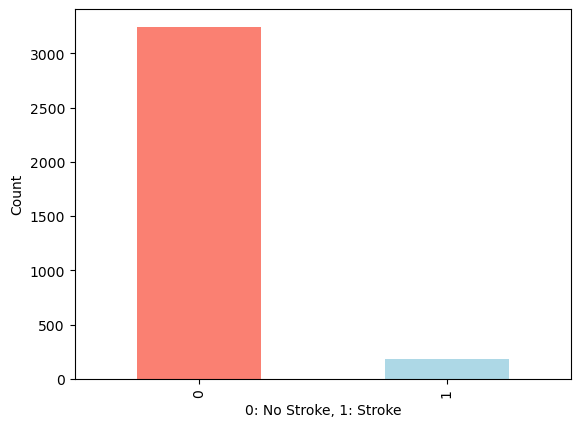

In [35]:
df['stroke'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: No Stroke, 1: Stroke')
plt.ylabel('Count');

In [36]:
df['gender'].value_counts()

0    2086
1    1339
Name: gender, dtype: int64

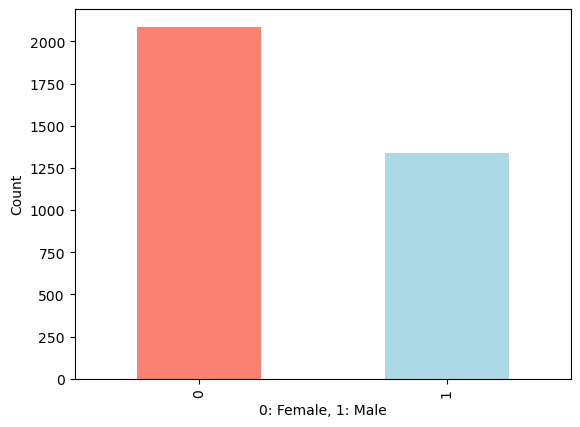

In [37]:
df['gender'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: Female, 1: Male')
plt.ylabel('Count');

In [38]:
pd.crosstab(df['gender'], df['stroke'])

stroke,0,1
gender,,
0,1981,105
1,1264,75


Nhóm nữ giới:

Tổng số nữ giới: 1981 + 105 = 2086

Tỷ lệ nữ giới bị đột quỵ: (105 / 2086) * 100 ≈ 5.03%

Nhóm nam giới:

Tổng số nam giới: 1264 + 75 = 1339

Tỷ lệ nam giới bị đột quỵ: (75 / 1339) * 100 ≈ 5.60%

Kết luận:

Nhóm nữ giới: Trong số nữ giới, khoảng 5.03% bị đột quỵ.

Nhóm nam giới: Trong số nam giới, khoảng 5.60% bị đột quỵ.

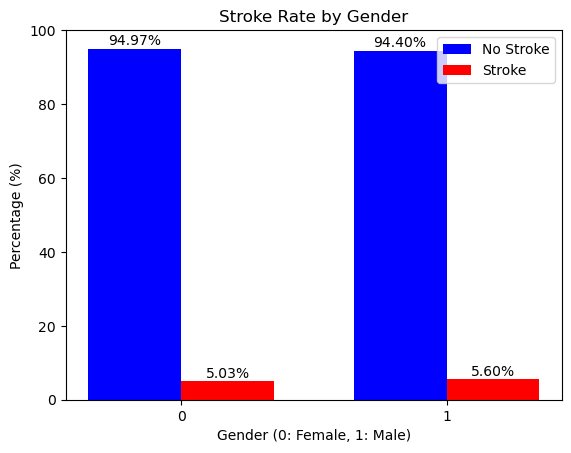

In [39]:
# Tạo bảng chéo giữa giới tính và đột quỵ
gender_stroke_crosstab = pd.crosstab(df['gender'], df['stroke'])

# Vị trí của các thanh
x = np.arange(len(gender_stroke_crosstab))

# Độ rộng của mỗi thanh
width = 0.35


# Tính tỷ lệ phần trăm bệnh nhân bị đột quỵ
stroke_rate = gender_stroke_crosstab.div(gender_stroke_crosstab.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ thanh tỷ lệ phần trăm
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, stroke_rate[0], width, label='No Stroke', color='blue')
bars2 = ax.bar(x + width/2, stroke_rate[1], width, label='Stroke', color='red')


ax.set_xlabel('Gender (0: Female, 1: Male)')
ax.set_ylabel('Percentage (%)')
ax.set_title('Stroke Rate by Gender')
ax.set_xticks(x)
ax.set_xticklabels(gender_stroke_crosstab.index)
ax.legend()

# Hiển thị giá trị trên các cột
for i in range(len(x)):
    ax.text(i - width/2, stroke_rate[0].iloc[i] + 1, f'{stroke_rate[0].iloc[i]:.2f}%', ha='center')
    ax.text(i + width/2, stroke_rate[1].iloc[i] + 1, f'{stroke_rate[1].iloc[i]:.2f}%', ha='center')


plt.xticks(rotation=0)
plt.ylim(0, 100)  # Giới hạn trục y từ 0 đến 100
plt.show()



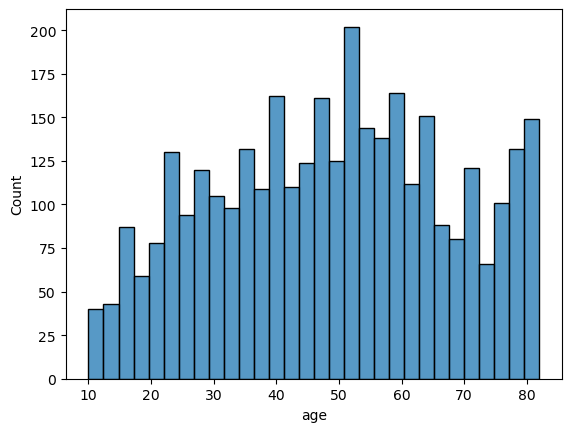

In [40]:
sns.histplot(data=df, x=df['age'], bins=30);

In [41]:
pd.crosstab(df['bmi'], df['stroke'])

stroke,0,1
bmi,,
0,698,29
1,1488,89
2,1011,61
3,48,1


Normal weight (0): Có 698 người không bị đột quỵ và 29 người bị đột quỵ.

Obesity (1): Có 1488 người không bị đột quỵ và 89 người bị đột quỵ.

Overweight (2): Có 1011 người không bị đột quỵ và 61 người bị đột quỵ.

Underweight (3): Có 48 người không bị đột quỵ và 1 người bị đột quỵ.

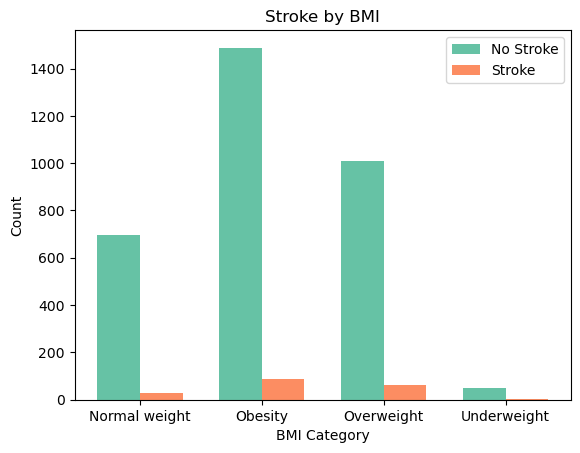

In [42]:
# Dữ liệu từ bảng chéo
bmi_stroke_crosstab = pd.crosstab(df['bmi'], df['stroke'])

# Tạo DataFrame từ dữ liệu
df_bmi_stroke = bmi_stroke_crosstab.reset_index()

# Vị trí của các thanh
x = np.arange(len(df_bmi_stroke))

# Độ rộng của mỗi thanh
width = 0.35

# Vẽ biểu đồ
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, df_bmi_stroke[0], width, label='No Stroke', color='#66c2a5')
bars2 = ax.bar(x + width/2, df_bmi_stroke[1], width, label='Stroke', color='#fc8d62')

# Thêm các nhãn và tiêu đề
ax.set_xlabel('BMI Category')
ax.set_ylabel('Count')
ax.set_title('Stroke by BMI')
ax.set_xticks(x)
ax.set_xticklabels(['Normal weight', 'Obesity', 'Overweight', 'Underweight'])
ax.legend()

plt.xticks(rotation=0)
plt.show()


In [43]:
pd.crosstab([df['age'], df['hypertension']], df['stroke'])

stroke             0  1
age hypertension       
10  0              9  0
11  0             12  0
12  0             19  0
13  0             19  0
14  0             24  0
...               .. ..
80  1             10  6
81  0             22  9
    1             13  3
82  0             30  5
    1              8  3

[129 rows x 2 columns]

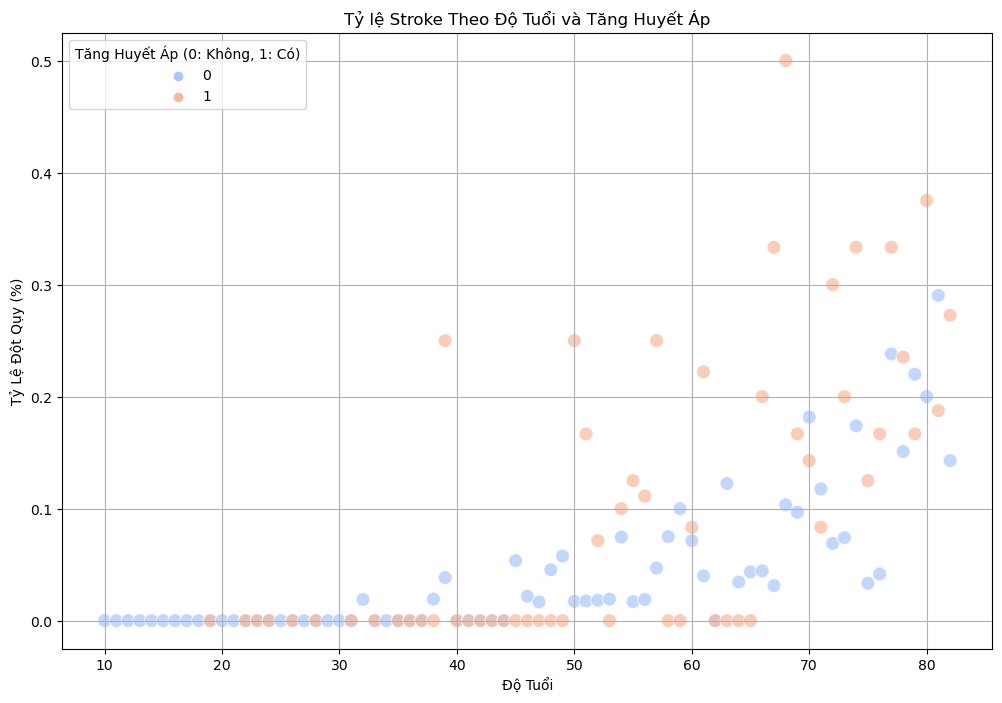

In [44]:
# Tạo ma trận giao chéo giữa 'age', 'hypertension', và 'stroke'
age_hypertension_stroke_crosstab = pd.crosstab([df['age'], df['hypertension']], df['stroke'])

# Tính tỷ lệ stroke cho mỗi nhóm (age, hypertension)
age_hypertension_stroke_rate = age_hypertension_stroke_crosstab[1] / age_hypertension_stroke_crosstab.sum(axis=1)

# Chuyển tỷ lệ stroke thành data
age_hypertension_stroke_rate_df = age_hypertension_stroke_rate.reset_index()
age_hypertension_stroke_rate_df.columns = ['Age', 'Hypertension', 'Stroke_Rate']

# Vẽ scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Stroke_Rate', hue='Hypertension', data=age_hypertension_stroke_rate_df, palette='coolwarm', s=100, alpha=0.7)

plt.title('Tỷ lệ Stroke Theo Độ Tuổi và Tăng Huyết Áp')
plt.xlabel('Độ Tuổi')
plt.ylabel('Tỷ Lệ Đột Qụy (%)')
plt.legend(title='Tăng Huyết Áp (0: Không, 1: Có)')
plt.grid(True)
plt.show()

In [45]:
pd.crosstab([df['age'], df['avg_glucose_level']], df['stroke'])

stroke                  0  1
age avg_glucose_level       
10  1                   8  0
    2                   1  0
11  0                   1  0
    1                   9  0
    2                   2  0
...                    .. ..
81  1                  18  9
    2                   5  0
82  0                  12  4
    1                  18  3
    2                   8  1

[218 rows x 2 columns]

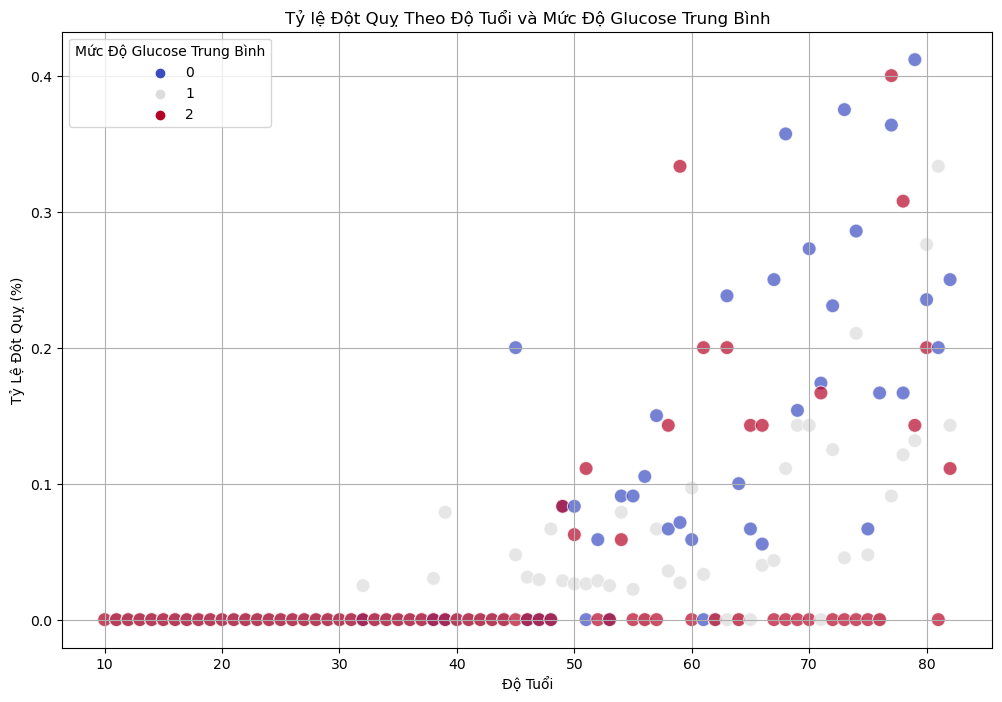

In [46]:
# Tạo ma trận giao chéo giữa 'age', 'avg_glucose_level', và 'stroke'
age_glucose_stroke_crosstab = pd.crosstab([df['age'], df['avg_glucose_level']], df['stroke'])

# Tính tỷ lệ stroke cho mỗi nhóm (age, avg_glucose_level)
age_glucose_stroke_rate = age_glucose_stroke_crosstab[1] / age_glucose_stroke_crosstab.sum(axis=1)

# Chuyển tỷ lệ stroke thành DataFrame
age_glucose_stroke_rate_df = age_glucose_stroke_rate.reset_index()
age_glucose_stroke_rate_df.columns = ['Age', 'Avg_Glucose_Level', 'Stroke_Rate']

# Vẽ scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Stroke_Rate', hue='Avg_Glucose_Level', data=age_glucose_stroke_rate_df, palette='coolwarm', s=100, alpha=0.7)

plt.title('Tỷ lệ Đột Quỵ Theo Độ Tuổi và Mức Độ Glucose Trung Bình')
plt.xlabel('Độ Tuổi')
plt.ylabel('Tỷ Lệ Đột Quỵ (%)')
plt.legend(title='Mức Độ Glucose Trung Bình')
plt.grid(True)
plt.show()


In [47]:
df['heart_disease'].value_counts()

0    3219
1     206
Name: heart_disease, dtype: int64

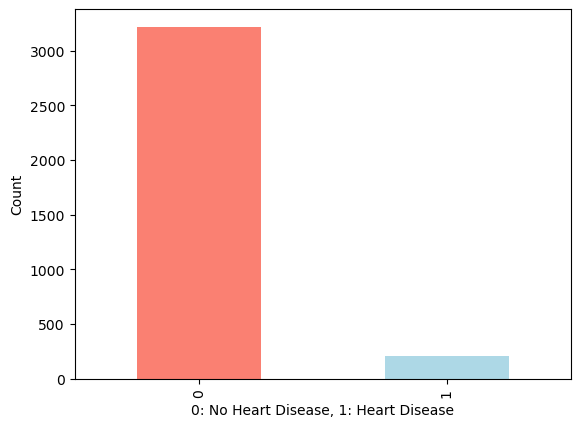

In [48]:
df['heart_disease'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: No Heart Disease, 1: Heart Disease')
plt.ylabel('Count');

In [49]:
pd.crosstab(df['heart_disease'], df['stroke'])

stroke,0,1
heart_disease,,
0,3075,144
1,170,36


Nhóm không bị bệnh tim:

Tổng số bệnh nhân: 3075 + 144 = 3219

Tỷ lệ bệnh nhân bị đột quỵ: (144 / 3219) * 100 ≈ 4.47%

Nhóm bị bệnh tim:

Tổng số bệnh nhân: 170 + 36 = 206

Tỷ lệ bệnh nhân bị đột quỵ: (36 / 206) * 100 ≈ 17.48%

Kết luận:

Nhóm không bị bệnh tim: Trong số những người không bị bệnh tim, chỉ có khoảng 4.47% bị đột quỵ.

Nhóm bị bệnh tim: Trong số những người bị bệnh tim, có khoảng 17.48% bị đột quỵ.

Điều này cho thấy rằng bệnh nhân bị bệnh tim có nguy cơ bị đột quỵ cao hơn so với những người không bị bệnh tim.

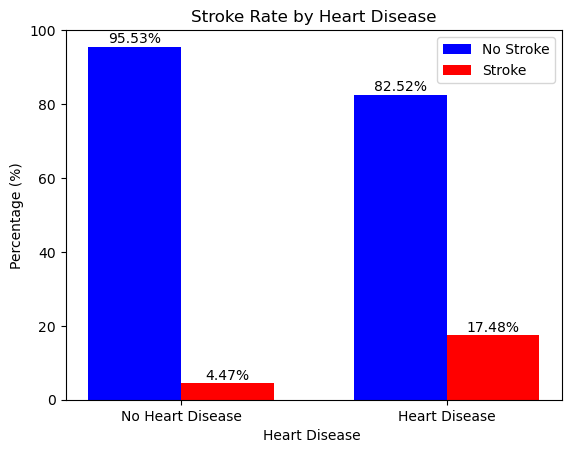

In [50]:
# Tạo bảng chéo giữa bệnh tim và đột quỵ
heart_stroke_crosstab = pd.crosstab(df['heart_disease'], df['stroke'])

# Vị trí của các thanh
x = np.arange(len(heart_stroke_crosstab))

# Độ rộng của mỗi thanh
width = 0.35



# Tính tỷ lệ phần trăm bệnh nhân bị đột quỵ
stroke_rate = heart_stroke_crosstab.div(heart_stroke_crosstab.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ thanh tỷ lệ phần trăm
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, stroke_rate[0], width, label='No Stroke', color='blue')
bars2 = ax.bar(x + width/2, stroke_rate[1], width, label='Stroke', color='red')

# Thêm các nhãn và tiêu đề
ax.set_xlabel('Heart Disease ')
ax.set_ylabel('Percentage (%)')
ax.set_title('Stroke Rate by Heart Disease')
ax.set_xticks(x)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
ax.legend()

# Hiển thị giá trị trên các cột
for i in range(len(x)):
    ax.text(i - width/2, stroke_rate[0].iloc[i] + 1, f'{stroke_rate[0].iloc[i]:.2f}%', ha='center')
    ax.text(i + width/2, stroke_rate[1].iloc[i] + 1, f'{stroke_rate[1].iloc[i]:.2f}%', ha='center')


plt.xticks(rotation=0)
plt.ylim(0, 100)  # Giới hạn trục y từ 0 đến 100
plt.show()



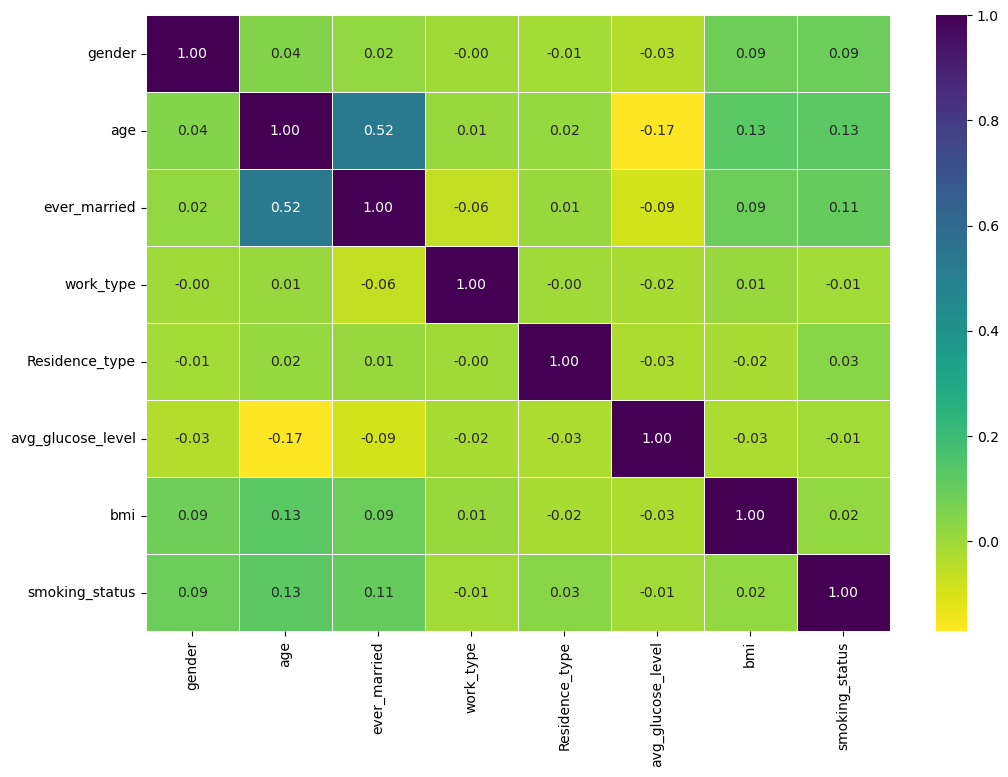

In [51]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='viridis_r');

## Model

In [52]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,0,1,1,1
1,1,80,0,1,1,2,0,2,1,0,1
2,0,49,0,0,1,2,1,0,1,1,1
3,0,79,1,0,1,3,0,0,0,0,1
4,1,81,0,0,1,2,1,0,2,1,1


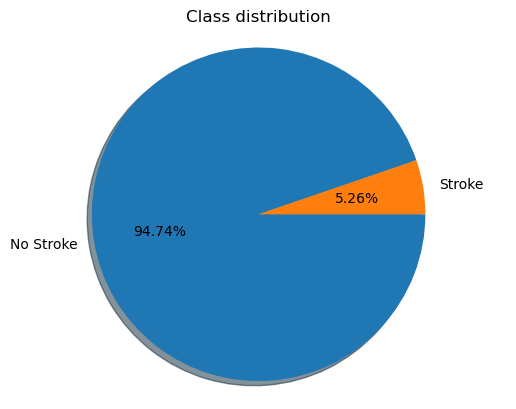

# samples associated with no stroke: 3245
# samples associated with stroke: 180


In [53]:
class_occur = df['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

In [54]:
# Chuyển đổi cột 'stroke' thành kiểu số nguyên
df['stroke'] = df['stroke'].astype(int)

In [55]:
print(df['stroke'].dtype)
print(df['stroke'].unique())

int32
[1 0]


## Xử lý lớp mất cân bằng
Có một số kỹ thuật có thể được sử dụng để xử lý lớp mất cân bằng cao. Bài này chúng ta sẽ sử dụng một trong những kỹ thuật oversampling được gọi là Kỹ thuật lấy mẫu quá mức thiểu số tổng hợp (SMOTE), nghĩa là nó tạo ra thêm dữ liệu cho lớp thiểu số, chứ không phải xóa bỏ dữ liệu từ lớp đa số. (minh họa trong hình bên dưới). Kỹ thuật lấy mẫu quá mức được chọn vì chúng ta không muốn mất một lượng thông tin đáng kể (97,88%) như khi chúng ta sử dụng kỹ thuật lấy mẫu quá mức.
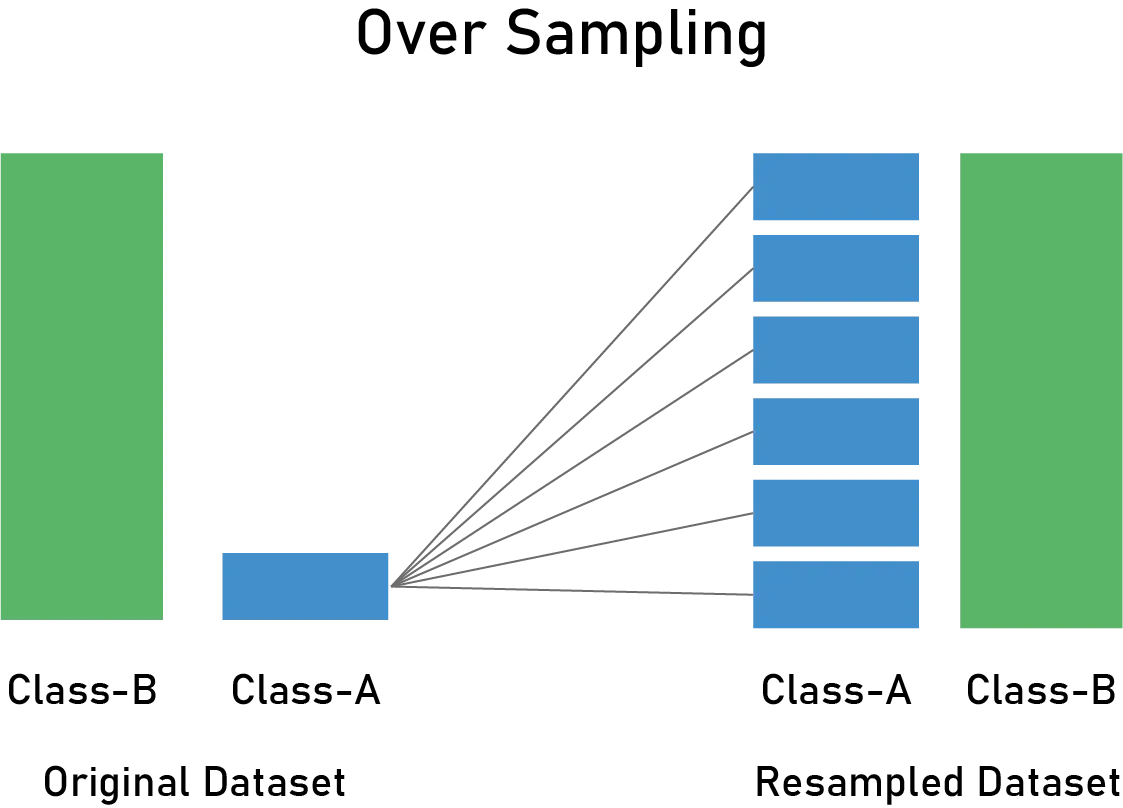

In [56]:
from imblearn.over_sampling import SMOTE

# Tạo đối tượng SMOTE
smote = SMOTE()

# Thực hiện resampling
X, y = smote.fit_resample(df.loc[:, df.columns != 'stroke'], df['stroke'])

print("Shape of X_resampled: {}".format(X.shape))
print("Shape of y_resampled: {}".format(y.shape))


Shape of X_resampled: (6490, 10)
Shape of y_resampled: (6490,)


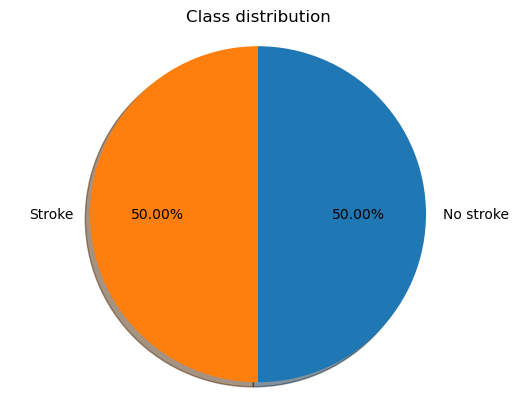

# samples associated with no stroke: 3245
# samples associated with stroke: 3245


In [57]:
# Kiểm tra dữ liệu sau khi resampling
_, class_counts = np.unique(y, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal') 
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

## Model Trainning

In [64]:
def split_train_test(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.2, random_state=42)

_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

print("[train] # class 0: {} | # class 1: {}".format(train_counts[0], train_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0], test_counts[1]))

[train] # class 0: 2596 | # class 1: 2596
[test]  # class 0: 649 | # class 1: 649


In [65]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [66]:
import joblib
# Lưu scaler vào file
scaler_path = 'C:/Users/nguye/Downloads/Compressed/DoAnChuyenNganh/scaler.pkl' 
joblib.dump(scaler, scaler_path)


['C:/Users/nguye/Downloads/Compressed/DoAnChuyenNganh/scaler.pkl']

In [67]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # Tính toán sensitivity (Độ nhạy)
    sensitivity = TP / (TP + FN)    
    # Tính toán specificity (Độ đặc hiệu)
    specificity = TN / (TN + FP)
    return sensitivity,specificity

## SVM

In [68]:
import time 
start = time.time()
svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train_std, y_train)
end = time.time()
print("Thời gian train hoàn thành {:.2f} seconds".format(end-start))

Thời gian train hoàn thành 4.40 seconds


In [69]:
# Dự đoán trên tập test
y_svm = svm_model.predict(X_test_std)
y_svm_prob = svm_model.predict_proba(X_test_std)

Classification report for SVM: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       649
           1       0.84      0.88      0.86       649

    accuracy                           0.86      1298
   macro avg       0.86      0.86      0.86      1298
weighted avg       0.86      0.86      0.86      1298

Confusion matrix for SVM: 
[[543 106]
 [ 80 569]]
Accuracy score for SVM: 0.86
Precision score for SVM: 0.84
Recall score for SVM: 0.88
F1 score for SVM: 0.86
Sensitivity score for SVM: 0.88
Specitivity score for SVM: 0.84
AUC score for SVM: 0.94


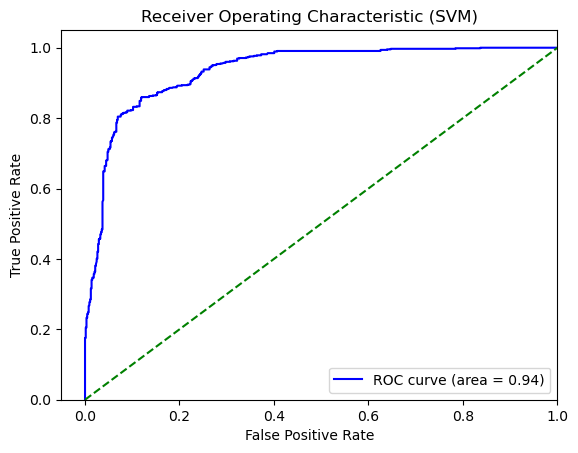

In [70]:
print("Classification report for SVM: \n{}".format(classification_report(y_test,y_svm)))
print("Confusion matrix for SVM: \n{}".format(confusion_matrix(y_test,y_svm)))
# Tính toán precision, recall, and f1 scores
acc_svm=accuracy_score(y_test,y_svm)
prec_svm = precision_score(y_test,y_svm)
rec_svm = recall_score(y_test,y_svm)
f1_svm = f1_score(y_test,y_svm)
print("Accuracy score for SVM: {:.2f}".format(acc_svm))
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))

# Tính toán sensitivity, specificity, and auc
sens_svm,spec_svm = calc_sens_spec(y_test,y_svm)
fpr, tpr, _ = roc_curve(y_test,  y_svm_prob[:,1])
auc_svm = roc_auc_score(y_test, y_svm_prob[:,1])
print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specitivity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
plt.show()

## LogisticRegressinon

In [71]:
start = time.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train_std, y_train)
end = time.time()
print("Thời gian train hoàn thành {:.2f} seconds".format(end-start))

Thời gian train hoàn thành 0.07 seconds


In [72]:
# Dự đoán trên tập test
y_logit = logit_model.predict(X_test_std)
y_logit_prob = logit_model.predict_proba(X_test_std)

Classification report for LR: 
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       649
           1       0.77      0.80      0.79       649

    accuracy                           0.78      1298
   macro avg       0.78      0.78      0.78      1298
weighted avg       0.78      0.78      0.78      1298

Confusion matrix for LR: 
[[497 152]
 [128 521]]
Accuracy score for LR: 0.78
Precision score for LR: 0.77
Recall score for LR: 0.80
F1 score for LR: 0.79
Sensitivity score for LR: 0.80
Specitivity score for LR: 0.77
AUC score for LR: 0.86


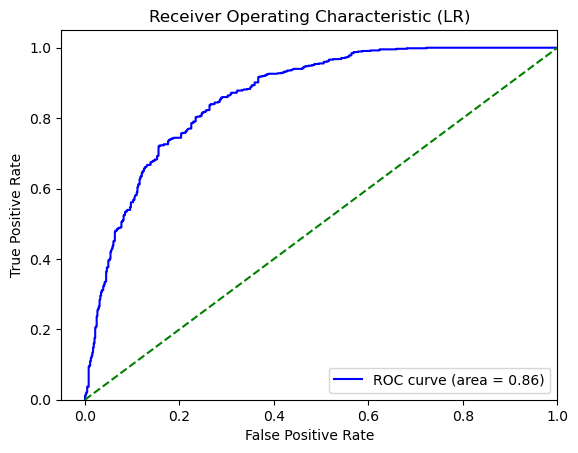

In [73]:
print("Classification report for LR: \n{}".format(classification_report(y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_logit)))
# Tính toán precision, recall, and f1 scores
acc_logit=accuracy_score(y_test,y_logit)
prec_logit = precision_score(y_test,y_logit)
rec_logit = recall_score(y_test,y_logit)
f1_logit = f1_score(y_test,y_logit)
print("Accuracy score for LR: {:.2f}".format(acc_logit))
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))

# Tính toán sensitivity, specificity, and auc
sens_logit,spec_logit = calc_sens_spec(y_test,y_logit)
fpr, tpr, _ = roc_curve(y_test,  y_logit_prob[:,1])
auc_logit = roc_auc_score(y_test, y_logit_prob[:,1])
print("Sensitivity score for LR: {:.2f}".format(sens_logit))
print("Specitivity score for LR: {:.2f}".format(spec_logit))
print("AUC score for LR: {:.2f}".format(auc_logit))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LR)')
ax.legend(loc="lower right")
plt.show()

## RandomForest

In [76]:
start = time.time()
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train_std, y_train)
end = time.time()
print("Thời gian train hoàn thành {:.2f} seconds".format(end-start))

Thời gian train hoàn thành 0.41 seconds


In [77]:
# Dự đoán trên tập test
y_ranfor = ranfor_model.predict(X_test_std)
y_ranfor_prob = ranfor_model.predict_proba(X_test_std)

Classification report for RF: 
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       649
           1       0.92      0.96      0.94       649

    accuracy                           0.94      1298
   macro avg       0.94      0.94      0.94      1298
weighted avg       0.94      0.94      0.94      1298

Confusion matrix for RF: 
[[597  52]
 [ 29 620]]
Accuracy score for RF: 0.94
Precision score for RF: 0.92
Recall score for RF: 0.96
F1 score for RF: 0.94
Sensitivity score for RF: 0.96
Specitivity score for RF: 0.92
AUC score for RF: 0.98


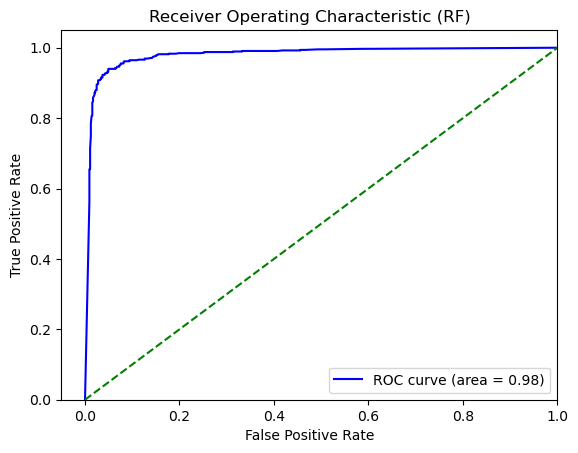

In [78]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_ranfor)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_ranfor)))
# Tính toán precision, recall, and f1 scores
acc_ranfor=accuracy_score(y_test,y_ranfor)
prec_ranfor = precision_score(y_test,y_ranfor)
rec_ranfor = recall_score(y_test,y_ranfor)
f1_ranfor = f1_score(y_test,y_ranfor)
print("Accuracy score for RF: {:.2f}".format(acc_ranfor))
print("Precision score for RF: {:.2f}".format(prec_ranfor))
print("Recall score for RF: {:.2f}".format(rec_ranfor))
print("F1 score for RF: {:.2f}".format(f1_ranfor))

# Tính toán sensitivity, specificity, and auc
sens_ranfor,spec_ranfor = calc_sens_spec(y_test,y_ranfor)
fpr, tpr, _ = roc_curve(y_test,  y_ranfor_prob[:,1])
auc_ranfor = roc_auc_score(y_test, y_ranfor_prob[:,1])
print("Sensitivity score for RF: {:.2f}".format(sens_ranfor))
print("Specitivity score for RF: {:.2f}".format(spec_ranfor))
print("AUC score for RF: {:.2f}".format(auc_ranfor))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
plt.show()

## XGBoost

In [79]:
from xgboost import XGBClassifier
start = time.time()
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_std, y_train)
end = time.time()
print("Thời gian train hoàn thành {:.2f} seconds".format(end-start))

Thời gian train hoàn thành 0.18 seconds


In [80]:
# Dự đoán trên tập test
y_xgb = xgb_model.predict(X_test_std)
y_xgb_prob = xgb_model.predict_proba(X_test_std)

Classification report for XGB: 
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       649
           1       0.92      0.95      0.93       649

    accuracy                           0.93      1298
   macro avg       0.93      0.93      0.93      1298
weighted avg       0.93      0.93      0.93      1298

Confusion matrix for XGB: 
[[595  54]
 [ 34 615]]
Accuracy score for XGB: 0.93
Precision score for XGB: 0.92
Recall score for XGB: 0.95
F1 score for XGB: 0.93
Sensitivity score for XGB: 0.95
Specitivity score for XGB: 0.92
AUC score for XGB: 0.98


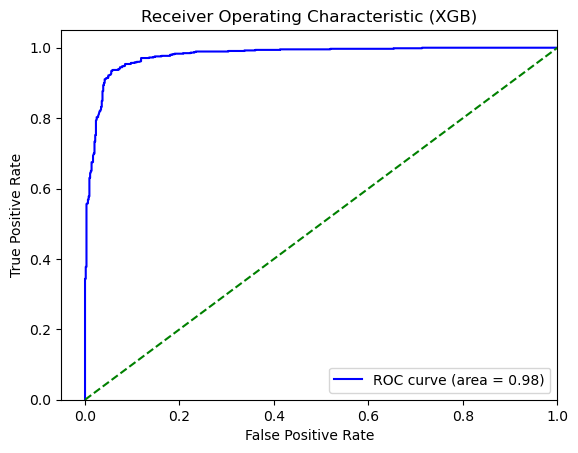

In [81]:
print("Classification report for XGB: \n{}".format(classification_report(y_test,y_xgb)))
print("Confusion matrix for XGB: \n{}".format(confusion_matrix(y_test,y_xgb)))

# Tính toán precision, recall, and f1 scores
acc_xgb=accuracy_score(y_test,y_xgb)
prec_xgb = precision_score(y_test,y_xgb)
rec_xgb = recall_score(y_test,y_xgb)
f1_xgb = f1_score(y_test,y_xgb)
print("Accuracy score for XGB: {:.2f}".format(acc_xgb))
print("Precision score for XGB: {:.2f}".format(prec_xgb))
print("Recall score for XGB: {:.2f}".format(rec_xgb))
print("F1 score for XGB: {:.2f}".format(f1_xgb))

# Tính toán sensitivity, specificity, and auc
sens_xgb,spec_xgb = calc_sens_spec(y_test,y_xgb)
fpr, tpr, _ = roc_curve(y_test,  y_xgb_prob[:,1])
auc_xgb = roc_auc_score(y_test, y_xgb_prob[:,1])
print("Sensitivity score for XGB: {:.2f}".format(sens_xgb))
print("Specitivity score for XGB: {:.2f}".format(spec_xgb))
print("AUC score for XGB: {:.2f}".format(auc_xgb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_xgb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (XGB)')
ax.legend(loc="lower right")
plt.show()

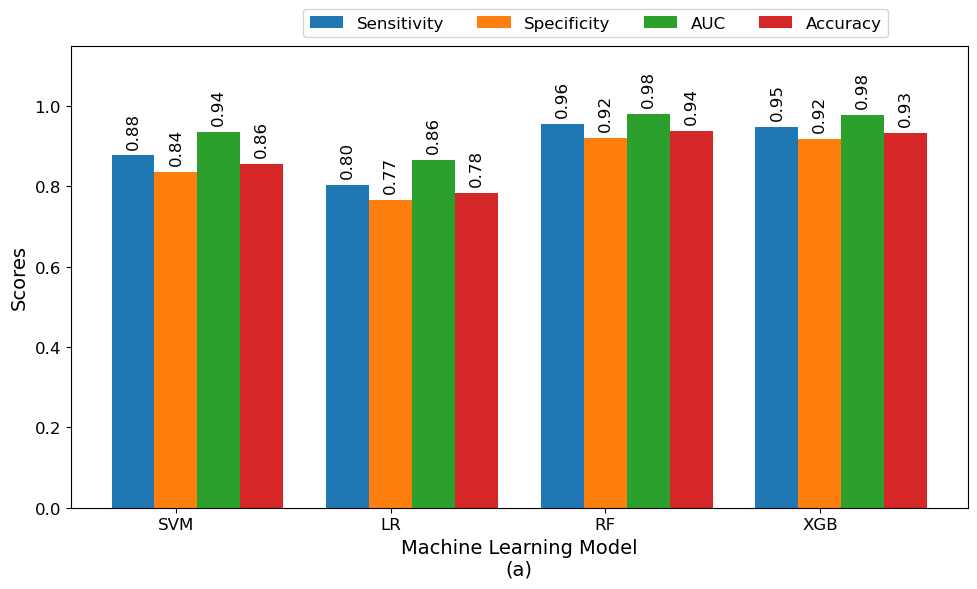

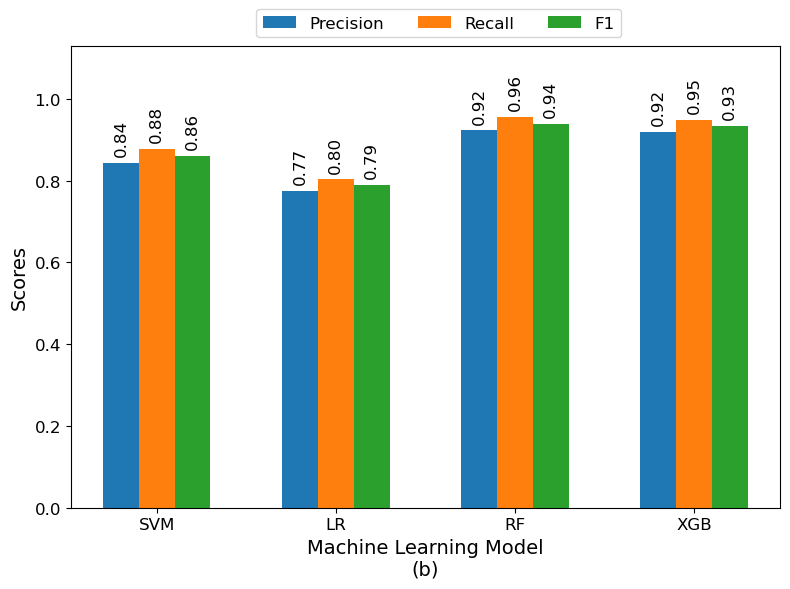

In [82]:
ml_names = ['SVM', 'LR', 'RF', 'XGB']
sens_all = [sens_svm, sens_logit, sens_ranfor, sens_xgb]
spec_all = [spec_svm, spec_logit, spec_ranfor, spec_xgb]
auc_all = [auc_svm, auc_logit, auc_ranfor, auc_xgb]
acc_all = [acc_svm, acc_logit, acc_ranfor, acc_xgb]

prec_all = [prec_svm, prec_logit, prec_ranfor, prec_xgb]
rec_all = [rec_svm, rec_logit, rec_ranfor, rec_xgb]
f1_all = [f1_svm, f1_logit, f1_ranfor, f1_xgb]

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.2  
r1 = np.arange(len(ml_names)) 
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

# plot sensitivity, specificity, auc, and accuracy
fig, ax = plt.subplots(figsize=(10,6))
bar1 = ax.bar(r1, sens_all, width, label='Sensitivity')
bar2 = ax.bar(r2, spec_all, width, label='Specificity')
bar3 = ax.bar(r3, auc_all, width, label='AUC')
bar4 = ax.bar(r4, acc_all, width, label='Accuracy')

ax.set_ylim([0,1.15])
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(a)", fontsize=14)
ax.legend(loc='lower left', ncol=4, bbox_to_anchor=(0.25, 1), fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
fig.tight_layout()
fig.savefig("ml_benchmark_auc_acc.pdf", bbox_inches='tight')
plt.show()

# plot precision, recall, and f1 
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')

ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(b)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()



C:\Users\nguye\AppData\Local\Temp\ipykernel_38624\1644984890.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(feature_names[ranfor_tree_sort_idx])
C:\Users\nguye\AppData\Local\Temp\ipykernel_38624\1644984890.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(feature_names[xgb_tree_sort_idx])


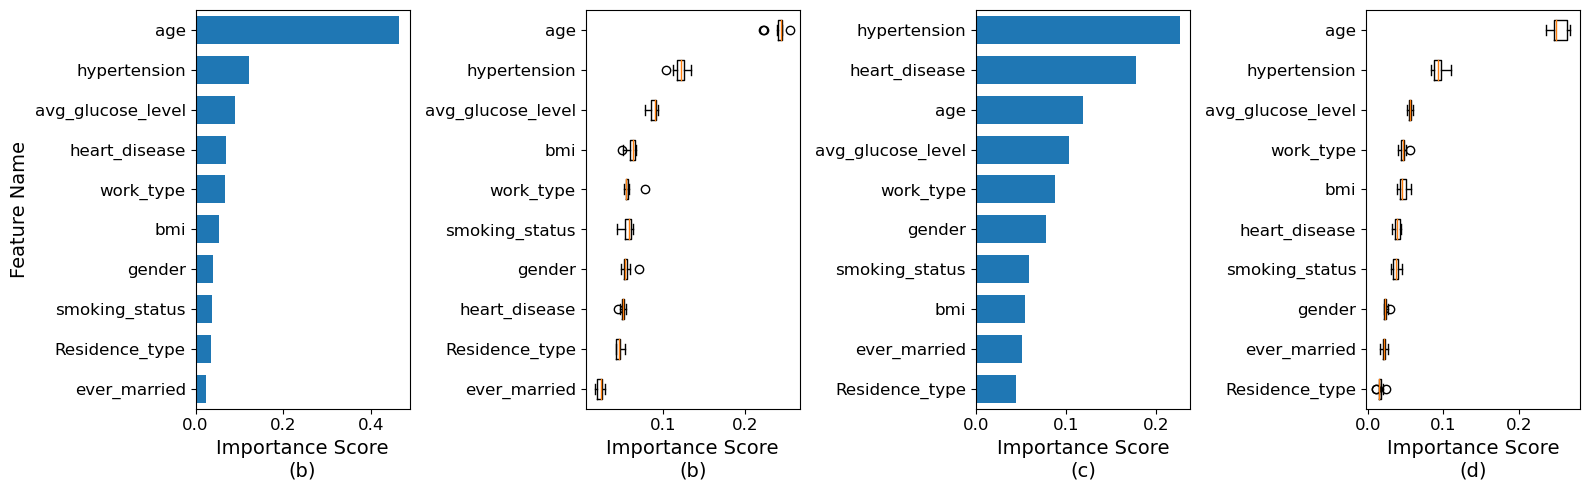

In [84]:
from sklearn.inspection import permutation_importance

# feature importance from random forest
feature_names = df.columns[:-1].to_numpy()
ranfor_perm_imp = permutation_importance(ranfor_model, X_test_std, y_test, n_repeats=10, random_state=42)
ranfor_perm_sort_idx = ranfor_perm_imp.importances_mean.argsort()

ranfor_tree_sort_idx = np.argsort(ranfor_model.feature_importances_)
ranfor_indices = np.arange(0, len(ranfor_model.feature_importances_)) + 0.5

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 5))
ax1.barh(ranfor_indices,ranfor_model.feature_importances_[ranfor_tree_sort_idx], height=0.7)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel("Importance Score\n(b)",fontsize=14)
ax1.set_ylabel("Feature Name",fontsize=14)
ax1.set_yticklabels(feature_names[ranfor_tree_sort_idx])
ax1.set_yticks(ranfor_indices)
ax1.set_ylim((0, len(ranfor_model.feature_importances_)))
ax2.boxplot(ranfor_perm_imp.importances[ranfor_perm_sort_idx].T,vert=False,labels=feature_names[ranfor_perm_sort_idx])
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel("Importance Score\n(b)",fontsize=14)

# feature importance from XGBoost
xgb_perm_imp = permutation_importance(xgb_model, X_test_std, y_test, n_repeats=10, random_state=42)
xgb_perm_sort_idx = xgb_perm_imp.importances_mean.argsort()

xgb_tree_sort_idx = np.argsort(xgb_model.feature_importances_)
xgb_indices = np.arange(0, len(xgb_model.feature_importances_)) + 0.5

ax3.barh(xgb_indices,xgb_model.feature_importances_[xgb_tree_sort_idx], height=0.7)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.set_xlabel("Importance Score\n(c)",fontsize=14)
ax3.set_yticklabels(feature_names[xgb_tree_sort_idx])
ax3.set_yticks(xgb_indices)
ax3.set_ylim((0, len(xgb_model.feature_importances_)))
ax4.boxplot(xgb_perm_imp.importances[xgb_perm_sort_idx].T,vert=False,labels=feature_names[xgb_perm_sort_idx])
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.set_xlabel("Importance Score\n(d)",fontsize=14)
fig.tight_layout()
fig.savefig("feature_importance.pdf", bbox_inches='tight')
plt.show()

In [85]:
X_test['hypertension'] = X_test['hypertension'].astype(int)
X_test['heart_disease'] = X_test['heart_disease'].astype(int)

In [87]:
# lưu mô hình .pkl
import pickle
with open('RandomForest_model.pkl', 'wb') as f:
    pickle.dump(ranfor_model, f)

In [124]:
with open('RandomForest_model.pkl', 'rb') as f:
    loadedRF_model = pickle.load(f)

In [130]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,0,1,1,1
1,1,80,0,1,1,2,0,2,1,0,1
2,0,49,0,0,1,2,1,0,1,1,1
3,0,79,1,0,1,3,0,0,0,0,1
4,1,81,0,0,1,2,1,0,2,1,1


In [131]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3420,1,82,1,0,1,3,0,1,2,0,0
3421,0,57,0,0,1,2,0,1,0,0,0
3422,0,81,0,0,1,3,1,2,1,0,0
3423,0,35,0,0,1,3,0,1,1,0,0
3424,1,51,0,0,1,2,0,0,2,1,0


In [132]:
feature_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [133]:
def predict_Stroke(gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, model, scaler, feature_columns):    
    # Khởi tạo DataFrame với kích thước bằng số lượng cột trong feature_columns
    x = pd.DataFrame(np.zeros((1, len(feature_columns))), columns=feature_columns)

    # Gán giá trị cho các đặc trưng theo tên cột tương ứng
    x.loc[0] = {
        'gender': gender,
        'age': age,
        'hypertension': hypertension,
        'heart_disease': heart_disease,
        'ever_married': ever_married,
        'work_type': work_type,
        'Residence_type': Residence_type,
        'avg_glucose_level': avg_glucose_level,
        'bmi': bmi,
        'smoking_status': smoking_status
    }

    # Chuyển hóa dữ liệu đầu vào bằng cách sử dụng scaler
    x_scaled = scaler.transform(x)

    # Dự đoán bằng mô hình đã được tải
    return loadedRF_model.predict(x_scaled)[0]



In [134]:
input_features = [
    0,  # gender
    81, # age
    0,  # hypertension
    0,  # heart_disease
    1,  # ever_married
    3,  # work_type
    1,  # Residence_type
    2,  # avg_glucose_level
    1,  # bmi
    0   # smoking_status
]

# Chuẩn hóa dữ liệu đầu vào
normalized_features = scaler.transform([input_features])

# Sử dụng mô hình để dự đoán xác suất
probabilities = loadedRF_model.predict_proba(normalized_features)[0]

# Lấy xác suất của lớp 1 (mắc bệnh)
stroke_probability = probabilities[1] * 100  # nhân với 100 để chuyển thành phần trăm

# Dự đoán kết quả dựa trên xác suất
if stroke_probability >= 50:
    result = 1
    print(f"Thuật toán chẩn đoán {stroke_probability:.2f}% có nguy cơ đột quỵ")
else:
    result = 0
    print(f"Thuật toán chẩn đoán {100 - stroke_probability:.2f}% không có nguy cơ đột quỵ")

# Thông báo kết quả dựa trên dự đoán
if result == 0:
    print("Chúc mừng bệnh nhân không mắc bệnh.")
else:
    print("Cẩn thận, bệnh nhân có nguy cơ mắc bệnh.")







Thuật toán chẩn đoán 86.52% không có nguy cơ đột quỵ
Chúc mừng bệnh nhân không mắc bệnh.


C:\Users\nguye\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
